Author: Shalini Rome

Based on code sourced here: https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

Date: 4/08/2022

# Data exploration

In [ ]:
#Import dataset:
dataset_test = pd.read_csv('C:/Users/sy6sh/Documents/A.UNSW_COURSE_FOLDERS/Honours 2022/Coding/28 July Coding/Database_duprem_All_AWRA_NDVI_Rain_MOF_data2022_07_29_22_02.csv')

# Dropping unecessary columns
dataset_test.drop([758,764],inplace = True) #Dropping the -3000 EVI and NDVI lines - need to manually check this if change database. Usually they are 770 and 776
dataset_test.drop(['Unnamed: 0','Year_Month','Latitude','Longitude','IPO_TPI'],axis = 1,inplace=True)
# Now it still has NDVI/EVI Quality Description and Geographic location. But they will not be included in Predictors. 

# Seeing how it looks

In [56]:
# Create columns of seasons for pair plotting colors
seasons = []

for month in dataset_test['Month']:
    if month in ['June', 'July', 'August']:
        seasons.append('winter')
    elif month in ['September', 'October', 'November']:
        seasons.append('spring')
    elif month in ['December', 'January', 'February']:
        seasons.append('summer')
    elif month in ['March', 'April', 'May']:
        seasons.append('fall')

# Will only use six variables for plotting pairs
reduced_features = dataset_test[['MYD13A3_061__1_km_monthly_EVI','MYD13A3_061__1_km_monthly_NDVI','Deep_Drainage','PET_Actual',	'E_Actual',	'Soil_M_root_zone',	'Qtot', 'Rainfall','ENSO','IOD','SAMI']]
reduced_features['season'] = seasons

C:\Users\sy6sh\AppData\Local\Temp\ipykernel_21296\2101868644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_features['season'] = seasons


In [55]:
reduced_features

,MYD13A3_061__1_km_monthly_EVI,MYD13A3_061__1_km_monthly_NDVI,Deep_Drainage,PET_Actual,E_Actual,Soil_M_root_zone,Qtot,Rainfall,IOD,SAMI,season
0,0.1664,0.3052,2.349609,157.679688,70.867188,0.265625,0.500000,57.000000,-0.051,1.34,fall
1,0.1311,0.2351,1.896484,203.679688,28.414062,0.146484,2.351562,84.101562,-0.009,0.36,summer
2,0.1385,0.2365,2.130859,273.570312,30.031250,0.082031,0.078125,4.398438,-0.036,-0.13,summer
3,0.2209,0.3371,0.298828,176.757812,27.703125,0.082031,0.054688,34.000000,-0.051,1.34,fall
4,0.2091,0.3028,0.271484,203.789062,7.820312,0.023438,0.015625,27.000000,-0.009,0.36,summer
...,...,...,...,...,...,...,...,...,...,...,...
933,0.2143,0.3101,1.437500,194.179688,79.210938,0.224609,0.054688,37.398438,0.143,1.14,spring
934,0.2226,0.3097,1.455078,215.671875,71.375000,0.196289,0.148438,63.500000,0.100,2.28,summer
935,0.1693,0.2471,1.431641,209.195312,57.593750,0.111328,0.210938,76.796875,0.116,1.95,summer
936,0.2290,0.3339,1.328125,167.609375,100.804688,0.370117,0.929688,91.601562,0.323,2.19,summer


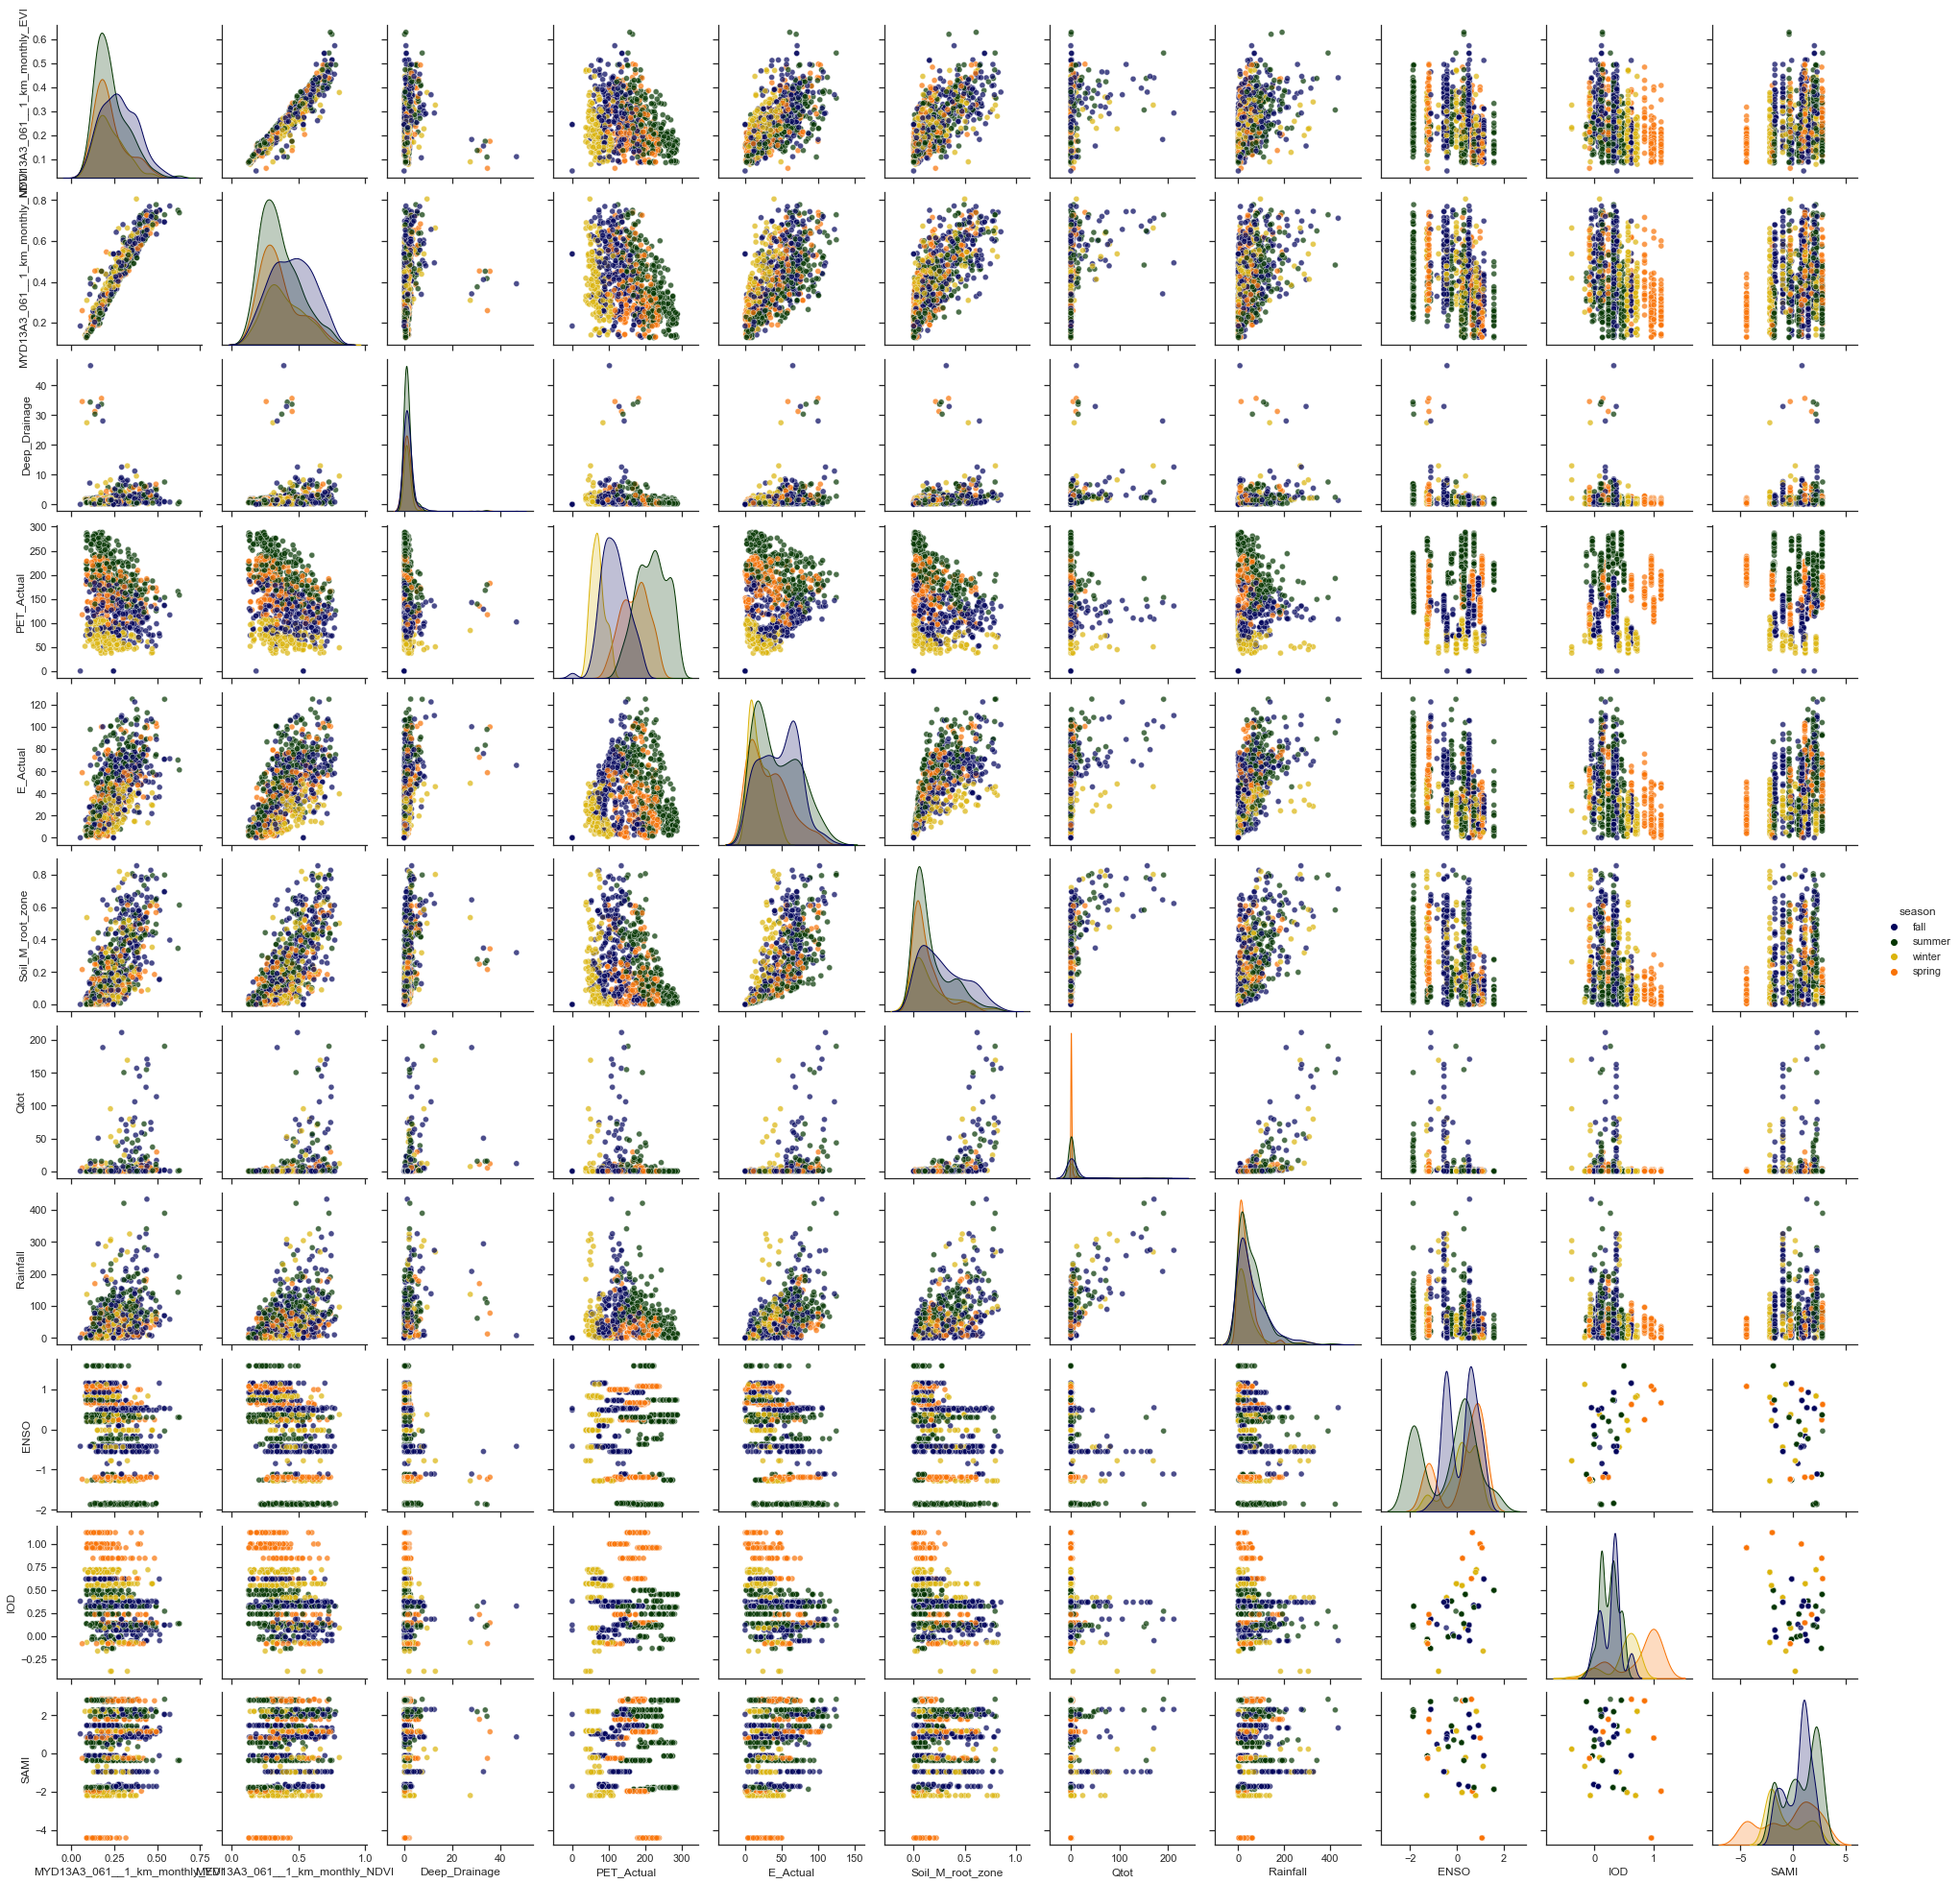

In [57]:
# Use seaborn for pair plots
import seaborn as sns
sns.set(style="ticks", color_codes=True);

# Create a custom color palete
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])

# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features, hue = 'season', diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True));

# Including Precipitation_acc_3 month

In [20]:
import pandas as pd
from datetime import datetime
import os
import numpy as np

# Combine_Database_Loc_data_2.combine_data('rain_acc3M', 'P_acc_3M' ,'Database_All_AWRA_NDVI_Rain_MOF_data2022_07_29_22_02')
# Error:TypeError: only size-1 arrays can be converted to Python scalars

prec_3m_df = pd.read_csv('rain_acc3M.csv', encoding = 'unicode_escape')
prec_3m_df.drop(['Year','Month','Longitude','Latitude'], axis=1, inplace = True)
prec_3m_df



# This is the database before checks and removing the -3000 NDVI and EVI. 
drought_database = pd.read_csv('Database_All_AWRA_NDVI_Rain_MOF_data2022_07_29_22_02.csv', encoding = 'unicode_escape')

# Set up code to merge:
clim_var = []
row = 1
clim_name = 'P_acc_3M' 

#For NDVI
for row in drought_database.itertuples():
    time = row.Year_Month
    loca = row.Location
    # print(row)
    func = ((prec_3m_df.loc[(prec_3m_df['Year_Month']== time) & (prec_3m_df['Location']== loca)][clim_name]))
    clim_var.append(float(func.values))
    # When the 'float' is removed then it works but the input are [90.29] and things like this. 
    # Error with float is TypeError: only size-1 arrays can be converted to Python scalars
    # https://stackoverflow.com/questions/36680402/typeerror-only-length-1-arrays-can-be-converted-to-python-scalars-while-plot-sh
    # np.vectorize does not work. 
    print(clim_var)
drought_database[clim_name] = clim_var

#Saving the file
drought_database.to_csv('Database_All_AWRA_NDVI_MOf_and_3MPrecip_data' + str(datetime.now().strftime('%Y_%m_%d_%H_%M')) +'.csv')

[145.5]
[145.5, 119.5]
[145.5, 119.5, 37.0]
[145.5, 119.5, 37.0, 68.203125]
[145.5, 119.5, 37.0, 68.203125, 41.0]
[145.5, 119.5, 37.0, 68.203125, 41.0, 44.703125]
[145.5, 119.5, 37.0, 68.203125, 41.0, 44.703125, 155.5078125]
[145.5, 119.5, 37.0, 68.203125, 41.0, 44.703125, 155.5078125, 89.8046875]
[145.5, 119.5, 37.0, 68.203125, 41.0, 44.703125, 155.5078125, 89.8046875, 36.1015625]
[145.5, 119.5, 37.0, 68.203125, 41.0, 44.703125, 155.5078125, 89.8046875, 36.1015625, 149.6015625]
[145.5, 119.5, 37.0, 68.203125, 41.0, 44.703125, 155.5078125, 89.8046875, 36.1015625, 149.6015625, 101.5]
[145.5, 119.5, 37.0, 68.203125, 41.0, 44.703125, 155.5078125, 89.8046875, 36.1015625, 149.6015625, 101.5, 41.6015625]
[145.5, 119.5, 37.0, 68.203125, 41.0, 44.703125, 155.5078125, 89.8046875, 36.1015625, 149.6015625, 101.5, 41.6015625, 155.09375]
[145.5, 119.5, 37.0, 68.203125, 41.0, 44.703125, 155.5078125, 89.8046875, 36.1015625, 149.6015625, 101.5, 41.6015625, 155.09375, 86.6953125]
[145.5, 119.5, 37.0, 6

TypeError: only size-1 arrays can be converted to Python scalars

I have two Wagga Wagga locations in the Rainfall 3 month file. This is because, I had two lat and lon coordinates in original datbaase for it. So I will use latitude instead of location name to get the proper values. I wonder why that was not a problem for the other values???

Update: Latitude and Longitude dont work. They come up with the same problem. How do I just get the first value if there are duplicates? 

In [ ]:
import pandas as pd
from datetime import datetime
import os
import numpy as np

# Combine_Database_Loc_data_2.combine_data('rain_acc3M', 'P_acc_3M' ,'Database_All_AWRA_NDVI_Rain_MOF_data2022_07_29_22_02')
# Error:TypeError: only size-1 arrays can be converted to Python scalars

prec_3m_df = pd.read_csv('rain_acc3M.csv', encoding = 'unicode_escape')
prec_3m_df.drop(['Year','Month','Latitude'], axis=1, inplace = True)

# This is the database before checks and removing the -3000 NDVI and EVI. 
drought_database = pd.read_csv('Database_All_AWRA_NDVI_Rain_MOF_data2022_07_29_22_02.csv', encoding = 'unicode_escape')

# Set up code to merge:
clim_var = []
row = 1
clim_name = 'P_acc_3M' 

#For NDVI
for row in drought_database.itertuples():
    time_a = row.Year_Month
    loca = row.Location
    lona = row.Longitude
    # print(row)
    func = ((prec_3m_df.loc[(prec_3m_df['Year_Month']== time_a) & (prec_3m_df['Location']== loca) & (prec_3m_df['Longitude']== lona)][clim_name]))
    clim_var.append(float(func.values))
    # When the 'float' is removed then it works but the input are [90.29] and things like this. 
    # Error with float is TypeError: only size-1 arrays can be converted to Python scalars
    # https://stackoverflow.com/questions/36680402/typeerror-only-length-1-arrays-can-be-converted-to-python-scalars-while-plot-sh
    # np.vectorize does not work. 
    # print(clim_var) # I printed it to discover that the code stopped working when it reached wagga wagga as it had two values. 
drought_database[clim_name] = clim_var

#Saving the file
drought_database.to_csv('Database_All_AWRA_NDVI_MOf_and_3MPrecip_data' + str(datetime.now().strftime('%Y_%m_%d_%H_%M')) +'.csv')

# Getting results
Date: 12 Aug 2022

Database used: Old one that was not checked. Only the months written half were changed and updated to be correct. 

Name of file: Database_All_AWRA_NDVI_MOf_and_3MPrecip_noWel_data_2022_08_12_16_48

This is because 3 lines had Wellington coordinates which were NZ not Australian. So I removed them


In [32]:
import pandas as pd
database_pred = pd.read_csv('Database_All_AWRA_NDVI_MOf_and_3MPrecip_noWel_data_2022_08_12_16_48.csv')
# Dropping unecessary columns
database_pred.drop(['Unnamed: 0','Unnamed: 0.1','Year_Month','Latitude','Longitude', 'MYD13A3_061__1_km_monthly_EVI','MYD13A3_061__1_km_monthly_NDVI','MYD13A3_061__1_km_monthly_VI_Quality_VI_Usefulness_Description','IPO_TPI'],axis = 1,inplace=True)
# Removed IPO and NDVI and EVI
database_pred

,Year,Month,Geographic Location,Location,Drought / No Drought,Deep_Drainage,PET_Actual,E_Actual,Soil_M_root_zone,Qtot,Rainfall,ENSO,IOD,SAMI,P_acc_3M
0,2014,March,Cobar,Cobar,1,2.349609,157.679688,70.867188,0.265625,0.500000,57.000000,0.54,-0.051,1.34,145.500000
1,2014,February,Cobar,Cobar,1,1.896484,203.679688,28.414062,0.146484,2.351562,84.101562,-0.37,-0.009,0.36,119.500000
2,2014,January,Cobar,Cobar,1,2.130859,273.570312,30.031250,0.082031,0.078125,4.398438,-1.26,-0.036,-0.13,37.000000
3,2014,March,Walgett,Walgett,1,0.298828,176.757812,27.703125,0.082031,0.054688,34.000000,0.54,-0.051,1.34,68.203125
4,2014,February,Walgett,Walgett,1,0.271484,203.789062,7.820312,0.023438,0.015625,27.000000,-0.37,-0.009,0.36,41.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2020,November,City of Wagga Wagga,Wagga Wagga,0,1.437500,194.179688,79.210938,0.224609,0.054688,37.398438,-1.19,0.143,1.14,194.304688
931,2020,December,City of Wagga Wagga,Wagga Wagga,0,1.455078,215.671875,71.375000,0.196289,0.148438,63.500000,-1.86,0.100,2.28,199.906250
932,2021,January,City of Wagga Wagga,Wagga Wagga,0,1.431641,209.195312,57.593750,0.111328,0.210938,76.796875,-1.87,0.116,1.95,173.601562
933,2021,February,City of Wagga Wagga,Wagga Wagga,0,1.328125,167.609375,100.804688,0.370117,0.929688,91.601562,-1.84,0.323,2.19,225.796875


In [33]:
# Dividing data into predictors (X) and no drought/drought (y)
y = database_pred.iloc[:,4].values #All rows and only the 4th column (Drought no drought)
X = database_pred 
X.drop(['Drought / No Drought'],axis = 1,inplace=True)
#Convert to array
X.to_numpy()

#----------------------------------------------------
#Dividing data into training and testing: 
from sklearn.model_selection import train_test_split

#Splitting by 0.2/0.8. First we create an Xtrain and X test that has Location, Year, Month, NDVI quality data etc. 
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Then we create the real X_train and X_test by removing those columns. This allows us to more easily see which ones were an issue. 
X_train = X_train_all.drop(['Year','Month','Geographic Location','Location'],axis = 1)
X_test = X_test_all.drop(['Year','Month','Geographic Location','Location'],axis = 1) 

#---------------------------------------------------------------
# Training the model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred_classifier = classifier.predict(X_test)
#---------------------------------------------------
predictions = classifier.predict_proba(X_test)
# predictions # Col 1 is 0 and Col 2 is 1. We can
prob_drought = predictions[:,1]
# prob_drought
X_test_all['ypred'] = prob_drought
X_test_all['y_obs'] = y_test
X_test_all
X_test_all.to_csv('X_test_all_12Aug2022.csv')
#------------------------------------------
prediction_train = classifier.predict_proba(X_train)
# prediction_train # Col 1 is 0 and Col 2 is 1. We can
prob_drought_train = prediction_train[:,1]
prob_drought_train
X_train_all['ypred'] = prob_drought_train
X_train_all['y_obs'] = y_train
X_train_all
X_train_all.to_csv('X_train_all_12Aug2022.csv')



Elapsed time to compute the importances: 0.656 seconds


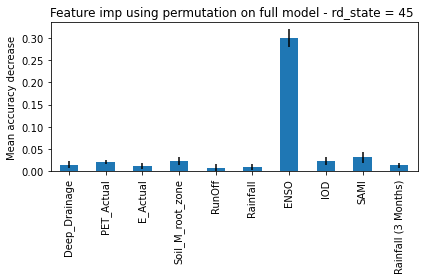

In [37]:
# -----------------------------------------------------------------------
# Plotting feature importance
import matplotlib.pyplot as plt
import time
import numpy as np

#Preparing variables
#feature_names = [f"feature {i}" for i in range(X_test.shape[1])] 
feature_names = ['Deep_Drainage','PET_Actual', 'E_Actual',	'Soil_M_root_zone',	'RunOff', 'Rainfall','ENSO','IOD','SAMI','Rainfall (3 Months)']
# To understand this line: https://stackoverflow.com/questions/10200268/what-does-shape-do-in-for-i-in-rangey-shape0
# .shape[] uses 0 as row and 1 as columns. Since X has also month and location data, we need to use X_test as the real number of columns. 

# Making feature importance
from sklearn.inspection import permutation_importance
start_time = time.time()
result = permutation_importance(classifier,X_test,y_test,n_repeats = 10,random_state = 45,n_jobs = 2)
# n_repeats = Number of times to permute a feature.; 
# n_jobs = Number of jobs to run in parallel. The computation is done by computing permutation score for each columns and parallelized over the columns. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)
#------------------------------------------------------------------------
#FIGURE
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature imp using permutation on full model - rd_state = 45 ")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
#plt.show()
plt.savefig('Feature_importance_rd_state_45_12Aug2022.png')

# Getting other results

In [38]:
### Getting other results
len(drought_database)
### False Positive
import numpy as np
#list_metrics = np.zeros((51,len(y_pred_classifier),len(y_pred_classifier)))
list_metrics = []
for i in range(51): 
        
    # Training the model
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators=20, random_state=i)
    classifier.fit(X_train, y_train)
    y_pred_classifier = classifier.predict(X_test)
    

    #predictions
    predictions = classifier.predict_proba(X_test)
    # predictions # Col 1 is 0 and Col 2 is 1. We can
    prob_drought = predictions[:,1]
    # prob_drought
    X_test_all['ypred'] = prob_drought
    X_test_all['y_obs'] = y_test
    #X_test_all.to_csv('X_test_all_'+ str(i) +'_.csv')

    prediction_train = classifier.predict_proba(X_train)
    # prediction_train # Col 1 is 0 and Col 2 is 1. We can
    prob_drought_train = prediction_train[:,1]
    prob_drought_train
    X_train_all['ypred'] = prob_drought_train
    X_train_all['y_obs'] = y_train
    #X_train_all.to_csv('X_train_all_'+ str(i) +'_.csv')
    
    
    # confusion matrix + other matrix
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    import pandas as pd
    
    # False Positives:
    # conf_m = confusion_matrix(y_test,y_pred_classifier)
    #  Source:https://datascience.stackexchange.com/questions/87654/is-there-a-flexible-way-to-get-the-original-data-indices-from-each-cell-of-a-con
    # Example - cm_A = confusion_matrix(ground_truths, pred_A)
    mistakes = np.invert(y_pred_classifier == y_test)
    count_fp = np.count_nonzero(mistakes)
    # print(type(count_fp))
    list_metrics = np.append(list_metrics,count_fp)

    

 
  

# It is cheaper to fill out a list than fill out a dataframe: https://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-then-filling-it
df_metrics = pd.DataFrame(list_metrics)
df_metrics.to_csv('Random_state_0_to_50_False_positive_12Aug.csv')



In [39]:
#### Accuracy
import numpy as np
#list_metrics = np.zeros((51,len(y_pred_classifier),len(y_pred_classifier)))
list_metrics = []
for i in range(51): 
        
    # Training the model
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators=20, random_state=i)
    classifier.fit(X_train, y_train)
    y_pred_classifier = classifier.predict(X_test)
    

    #predictions
    predictions = classifier.predict_proba(X_test)
    # predictions # Col 1 is 0 and Col 2 is 1. We can
    prob_drought = predictions[:,1]
    # prob_drought
    X_test_all['ypred'] = prob_drought
    X_test_all['y_obs'] = y_test
    #X_test_all.to_csv('X_test_all_'+ str(i) +'_.csv')

    prediction_train = classifier.predict_proba(X_train)
    # prediction_train # Col 1 is 0 and Col 2 is 1. We can
    prob_drought_train = prediction_train[:,1]
    prob_drought_train
    X_train_all['ypred'] = prob_drought_train
    X_train_all['y_obs'] = y_train
    #X_train_all.to_csv('X_train_all_'+ str(i) +'_.csv')
    
    
    # confusion matrix + other matrix
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    import pandas as pd
   
    # Accuracy:
    acc = accuracy_score(y_test, y_pred_classifier)
    list_metrics= np.append(list_metrics,acc)

 
  

# It is cheaper to fill out a list than fill out a dataframe: https://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-then-filling-it
df_metrics = pd.DataFrame(list_metrics)
df_metrics.to_csv('Random_state_0_to_50_accuracy_12Aug.csv')


In [41]:
### Classification report
import numpy as np
#list_metrics = np.zeros((51,len(y_pred_classifier),len(y_pred_classifier)))
list_metrics = []
for i in range(51): 
        
    # Training the model
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators=20, random_state=i)
    classifier.fit(X_train, y_train)
    y_pred_classifier = classifier.predict(X_test)
      
    
    # confusion matrix + other matrix
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    import pandas as pd
    
    # Function
    def classification_report_csv(report,rd_state):
        report_data = []
        lines = report.split('\n')
        for line in lines[2:-5]:
            row = {}
            
            row_data = ' '.join(line.split())   
            row_data = row_data.split(' ')
            
            row['class'] = row_data[0]
            row['precision'] = float(row_data[1])
            row['recall'] = float(row_data[2])
            row['f1_score'] = float(row_data[3])
            row['support'] = float(row_data[4])
            report_data.append(row)
            # return report_data #https://stackoverflow.com/questions/3052793/python-output-from-functions

        dataframe = pd.DataFrame.from_dict(report_data)
        dataframe.to_csv('classification_report_'+'12Aug2022_'+ str(rd_state) + '.csv', index = False)
    
    report = classification_report(y_test, y_pred_classifier)
    class_r = classification_report_csv(report,i)

    # append dataframe
    list_metrics = np.append(list_metrics,class_r)
  

# It is cheaper to fill out a list than fill out a dataframe: https://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-then-filling-it
df_metrics = pd.DataFrame(list_metrics)


##Combining classification reports
import glob
import os
##Setting path of files and giving name
files = os.path.join("classification_report_12Aug2022*.csv")
##List of merged files returned
files = glob.glob(files)
## Join files with concat
df_files = pd.concat(map(pd.read_csv, files), ignore_index=True)
# print(df_files)
##Saving to csv
#df_files.to_csv('Random_state_0_to_50_Classification_Report_final_9Aug_nodup.csv')
df_files.to_csv('Random_state_0_to_50_Classification_Report_final_12Aug.csv')



     class  precision  recall  f1_score  support
0        0       0.92    0.90      0.91     80.0
1        1       0.93    0.94      0.94    107.0
2        0       0.89    0.93      0.91     80.0
3        1       0.94    0.92      0.93    107.0
4        0       0.89    0.91      0.90     80.0
..     ...        ...     ...       ...      ...
97       1       0.93    0.93      0.93    107.0
98       0       0.91    0.93      0.92     80.0
99       1       0.94    0.93      0.94    107.0
100      0       0.84    0.90      0.87     80.0
101      1       0.92    0.87      0.89    107.0

[102 rows x 5 columns]


## Loop that trains RF and generates metric results

Question: What about changing random state for splitting the dataset? 

In [ ]:
# Importing numpy
import numpy as np
import pandas as pd
# For plotting feature importance: 
import matplotlib.pyplot as plt
import time
# For dividing training and testing  
from sklearn.model_selection import train_test_split
#For training the model
from sklearn.ensemble import RandomForestClassifier
# For metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# I ended up not using confusion matrix. But I could actually calculate it. 
# For feature importance plots:
from sklearn.inspection import permutation_importance

# Downloading database:
database_pred = pd.read_csv('Database_All_AWRA_NDVI_MOf_and_3MPrecip_noWel_data_2022_08_12_16_48.csv')
# Dropping unecessary columns -  removing IPO and NDVI and EVI
database_pred.drop(['Unnamed: 0','Unnamed: 0.1','Year_Month','Latitude','Longitude', 'MYD13A3_061__1_km_monthly_EVI','MYD13A3_061__1_km_monthly_NDVI','MYD13A3_061__1_km_monthly_VI_Quality_VI_Usefulness_Description','IPO_TPI'],axis = 1,inplace=True)

# Dividing data into predictors (X) and no drought/drought (y)
y = database_pred.iloc[:,4].values #All rows and only the 4th column (Drought no drought)
X = database_pred 
X.drop(['Drought / No Drought'],axis = 1,inplace=True)
#Convert to array
X.to_numpy()

# ----------------------------TRAINING AND RESULTS WITH DIFF RANDOM STATES---------------------------------------------------------------------------------------------------------------------------
# Creating a dictionary called list_metrics
acc_list_metrics = []
fp_list_metrics = []

for i in range(51): 
    # ----------------------------SPLITTING TRAINING AND TESTING DATASET--------------------------------------------
    #Dividing data into training and testing: 
    # from sklearn.model_selection import train_test_split
    # I put it above
 
    #Splitting by 0.2/0.8. First we create an Xtrain and X test that has Location, Year, Month, NDVI quality data etc. 
    X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= i)

    # Then we create the real X_train and X_test by removing those columns. This allows us to more easily see which ones were an issue. 
    X_train = X_train_all.drop(['Year','Month','Geographic Location','Location'],axis = 1)
    X_test = X_test_all.drop(['Year','Month','Geographic Location','Location'],axis = 1) 

    # --------------------------------TRAINING THE MODEL---------------------------------------------        
    # Training the model
    # from sklearn.ensemble import RandomForestClassifier # See above
    classifier = RandomForestClassifier(n_estimators=20, random_state=i)
    classifier.fit(X_train, y_train)
    y_pred_classifier = classifier.predict(X_test)
    
    # ----------------------------- GETTING PREDICTIONS------------------------
    #predictions for X_test
    predictions = classifier.predict_proba(X_test)
    # predictions # Col 1 is 0 and Col 2 is 1. We can
    prob_drought = predictions[:,1]
    # prob_drought
    X_test_all['ypred'] = prob_drought
    X_test_all['y_obs'] = y_test
    X_test_all.to_csv('X_test_all_'+ str(i) +'_15Aug.csv')

    # predictions for X_train to make sure it is correct. This helps to check if it is classifying D/no D correctly
    prediction_train = classifier.predict_proba(X_train)
    # prediction_train # Col 1 is 0 and Col 2 is 1. We can
    prob_drought_train = prediction_train[:,1]
    
    X_train_all['ypred'] = prob_drought_train
    X_train_all['y_obs'] = y_train
    X_train_all.to_csv('X_train_all_'+ str(i) +'_15Aug.csv')
    
    # ----------------------------GETTING METRICS-------------------------------------------------------
    # confusion matrix + other matrix
    # from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
    # See above
        
    # False Positives:
    mistakes = np.invert(y_pred_classifier == y_test)
    count_fp = np.count_nonzero(mistakes)
    fp_list_metrics = np.append(fp_list_metrics,count_fp)

    # Accuracy:
    acc = accuracy_score(y_test, y_pred_classifier)
    acc_list_metrics= np.append(acc_list_metrics,acc)

    # Classification report:
    # Function
    def classification_report_csv(report,rd_state):
        report_data = []
        lines = report.split('\n')
        for line in lines[2:-5]:
            row = {}
            
            row_data = ' '.join(line.split())   
            row_data = row_data.split(' ')
            
            row['class'] = row_data[0]
            row['precision'] = float(row_data[1])
            row['recall'] = float(row_data[2])
            row['f1_score'] = float(row_data[3])
            row['support'] = float(row_data[4])
            report_data.append(row)
            # return report_data #https://stackoverflow.com/questions/3052793/python-output-from-functions

        dataframe = pd.DataFrame.from_dict(report_data)
        dataframe.to_csv('classification_report_'+'15Aug2022_'+ str(rd_state) + '.csv', index = False)
    
    report = classification_report(y_test, y_pred_classifier)
    classification_report_csv(report,i) # Previously I assigned it a variable but it returns a csv anyway so I dont need to. 

    # ---------------------PLOTTING FEATURE IMPORTANCE-------------------------------------------------- 
    #Preparing variables
    feature_names = ['Deep_Drainage','PET_Actual', 'E_Actual',	'Soil_M_root_zone',	'RunOff', 'Rainfall','ENSO','IOD','SAMI','Rainfall (3 Months)']
    # To understand this line: https://stackoverflow.com/questions/10200268/what-does-shape-do-in-for-i-in-rangey-shape0
    # .shape[] uses 0 as row and 1 as columns. Since X has also month and location data, we need to use X_test as the real number of columns. 

    # Making feature importance
    # from sklearn.inspection import permutation_importance
    # sEE ABOVE
    
    # I also removed the computation time taken to calculate the feature importance
    result = permutation_importance(classifier,X_test,y_test,n_repeats = 10,random_state = i,n_jobs = 2)
    forest_importances = pd.Series(result.importances_mean, index=feature_names)

    #-----------------------FIGURE-------------------------------------------------
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
    ax.set_title("Feature importance - rd_state = " + str(i))
    ax.set_ylabel("Mean accuracy decrease")
    fig.tight_layout()
    #plt.show()
    plt.savefig('Feature_importance_rd_state_' + str(i) + '_15Aug2022.png')


# It is cheaper to fill out a list than fill out a dataframe: https://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-then-filling-it
df_fp_metrics = pd.DataFrame(fp_list_metrics)
df_fp_metrics.to_csv('Random_state_0_to_50_False_positive_15Aug.csv')
df_acc_metrics = pd.DataFrame(acc_list_metrics)
df_acc_metrics.to_csv('Random_state_0_to_50_Acc_15Aug.csv')

##Combining classification reports
import glob
import os
##Setting path of files and giving name
files = os.path.join("classification_report_15Aug2022*.csv")
##List of merged files returned
files = glob.glob(files)
## Join files with concat
df_files = pd.concat(map(pd.read_csv, files), ignore_index=True)
# print(df_files)
##Saving to csv
df_files.to_csv('Random_state_0_to_50_Classification_Report_final_15Aug.csv')


# Combining files:
Random_state_0_to_50_Classification_Report_final.csv

Random_state_0_to_50_Accuracy.csv


In [78]:
#Import dataset:
comb_class_report = pd.read_csv('Random_state_0_to_50_Classification_Report_final_15Aug.csv')
comb_acc = pd.read_csv('Random_state_0_to_50_Acc_15Aug.csv')
comb_false_pos = pd.read_csv('Random_state_0_to_50_False_positive_15Aug.csv')

In [79]:
# Replicating accuracy
newdf_acc = pd.DataFrame(np.repeat(comb_acc.values, 2, axis=0))
newdf_acc.columns = comb_acc.columns
newdf_acc.rename(columns = {"0":"Accuracy"}, inplace = True)
print(newdf_acc)

     Unnamed: 0  Accuracy
0           0.0  0.925134
1           0.0  0.925134
2           1.0  0.925134
3           1.0  0.925134
4           2.0  0.919786
..          ...       ...
97         48.0  0.914439
98         49.0  0.919786
99         49.0  0.919786
100        50.0  0.919786
101        50.0  0.919786

[102 rows x 2 columns]


In [80]:
new_fp_df = pd.DataFrame(np.repeat(comb_false_pos.values, 2, axis=0))
new_fp_df.columns = comb_false_pos.columns
new_fp_df.rename(columns = {"0":"False Positive"}, inplace = True)
new_fp_df

,Unnamed: 0,False Positive
0,0.0,14.0
1,0.0,14.0
2,1.0,14.0
3,1.0,14.0
4,2.0,15.0
...,...,...
97,48.0,16.0
98,49.0,15.0
99,49.0,15.0
100,50.0,15.0


In [73]:
# frames = [comb_class_report,newdf]
# comb_metrics = pd.concat(frames,join = 'outer')
comb_metrics = comb_class_report.join(newdf_acc,lsuffix='_left', rsuffix='_right') #https://stackoverflow.com/questions/26645515/pandas-join-issue-columns-overlap-but-no-suffix-specified
comb_metrics.drop(comb_metrics.columns[[0,6]], axis = 1, inplace = True)


comb_metrics = comb_metrics.join(new_fp_df,lsuffix='_left', rsuffix='_right')
#comb_metrics.drop(comb_metrics.columns[[6]], axis = 1, inplace = True)
 
comb_metrics.to_csv('Combined_Metrics_test_database_15Aug.csv')

